# Read csv and plot<sub> jupyter notebook version </sub>



## with csv

In [2]:
import csv
import matplotlib.pyplot as plt

In [3]:
#open csv file an read data
with open('data.csv') as csvfile:
    
    # build reader
    readCSV = csv.reader(csvfile, delimiter=',')
    
    #init line number
    line_num=0
    
    #init header
    header=None
    
    # init data dictionary
    cols={}
    
    #retrieve data
    for row in readCSV:
        if line_num==0:  # get header --> columns name in the csv file       
            header=row          
            
            for i in range(len(header)): # build list for each column
                cols[header[i]] = []
        
        else: # get data and put them into the lists
            for i in range(len(header)): #get the data
                cols[header[i]].append(row[i])
            
        line_num+=1 # iterate

In [4]:
# print result        
print(40*'#','\n\n')        
print 
print('My csv file has {} columns\n'.format(len(header)))
       
for i in range(len(header)):       
    print('columns name {} is: {}'.format(i,header[i]))

print('\n\n',40*'#')

######################################## 


My csv file has 3 columns

columns name 0 is: x
columns name 1 is: f
columns name 2 is: g


 ########################################


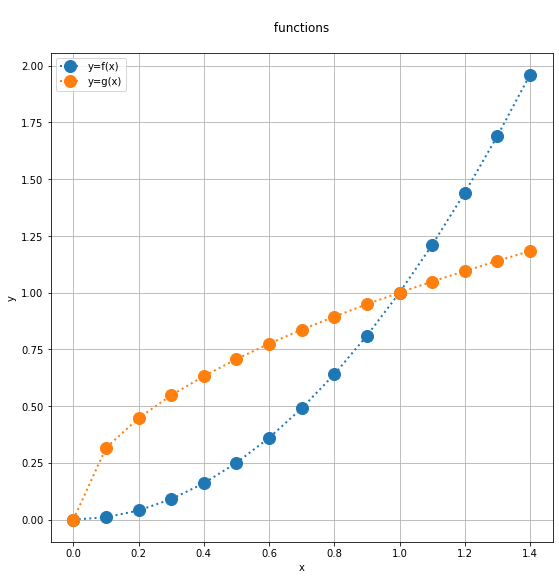

In [5]:
# plot
plt.figure(figsize=(9,9)) #figure dimention
plt.xlabel('x') # x axis label
plt.ylabel('y') # y axis label
plt.title('\n functions \n') # title

for i in range(1,len(header)):
    plt.plot(
             [float(j) for j in cols[header[0]]], # x
             [float(j) for j in cols[header[i]]], # y
             label='y={}(x)'.format(header[i]), # name for legend
             marker='o', # can be '+' , '^' ,'*','>','o','.'
             markersize=12, # 0 for no marker           
             linestyle='dotted', #'solid', 'dashed', 'dashdot', 'dotted'
             linewidth=2,  #0 for no line            
             ) # name for legend


plt.grid()
plt.legend()
plt.show()

## with pandas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
#import csv file in a pandas dataframe
df=pd.read_csv('data.csv',sep=',')

<IPython.core.display.Javascript object>


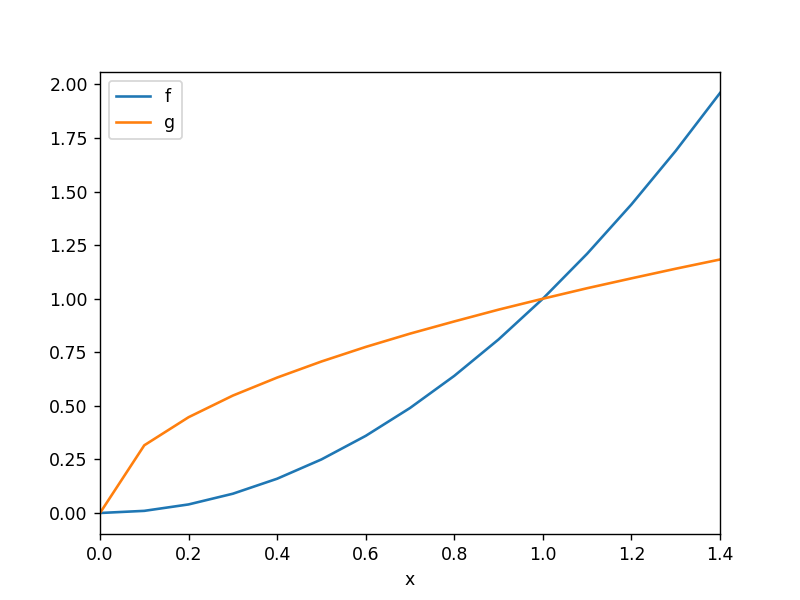

In [8]:
#fast plot
df.set_index('x').plot()
plt.show()

<IPython.core.display.Javascript object>


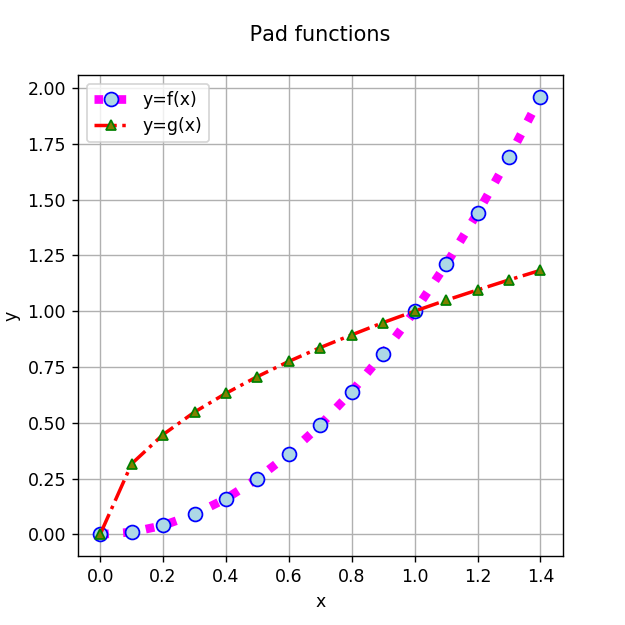

In [9]:
#slow plot
plt.figure(figsize=(5,5)) #figure dimention
plt.xlabel('x') # x axis label
plt.ylabel('y') # y axis label
plt.title('\n Pad functions \n') # title

plt.plot(
          df['x'], # x
          df['f'], # y
          label='y=f(x)', # name for legend
          marker='o', # can be '+' , '^' ,'*','>','o','.'
          markersize=8, # 0 for no marker
          markeredgecolor='blue', 
          markerfacecolor='lightblue',
          linestyle='dotted', #'solid', 'dashed', 'dashdot', 'dotted'
          linewidth=5,  #0 for no line
          color='magenta' # if commented automatic color management                
          ) # name for legend

plt.plot(
          df['x'], # x
          df['g'], # y
          label='y=g(x)', # name for legend
          marker='^', # can be '+' , '^' ,'*','>','o','.'
          markersize=6, # 0 for no marker
          markeredgecolor='green',
          markerfacecolor='olive',
          linestyle='dashdot', #'solid', 'dashed', 'dashdot', 'dotted'
          linewidth=2,  #0 for no line
          color='red'  # if commented automatic color management          
          ) # name for legend


plt.grid() # display grid
plt.legend() # display legend
plt.show()

# Dynamic chart

<IPython.core.display.Javascript object>


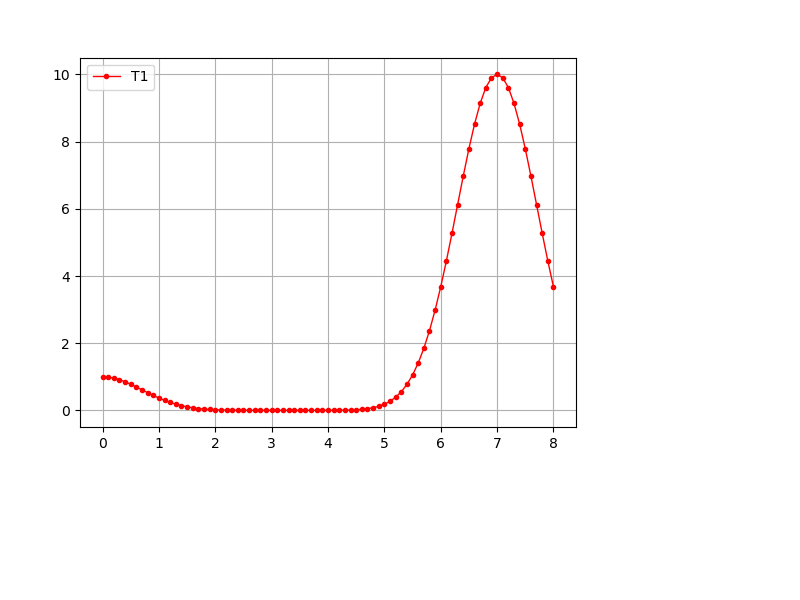

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.ion()
class DynamicUpdate():

    def on_launch(self):
        #Set up plot
        self.figure, self.ax = plt.subplots()
        self.lines, = self.ax.plot([],[], 'o',label='T1',color='red',linestyle='solid',linewidth=1,markersize=3)
        #Autoscale on unknown axis and known lims on the other
        self.ax.set_autoscaley_on(True)
        self.ax.set_autoscalex_on(True)
        #self.ax.set_xlim(self.min_x, self.max_x)
        #Other stuff
        self.ax.grid()
        self.ax.legend()

    def on_running(self, xdata, ydata):
        #Update data (with the new _and_ the old points)
        self.lines.set_xdata(xdata)
        self.lines.set_ydata(ydata)
        #Need both of these in order to rescale
        self.ax.relim()
        self.ax.autoscale_view()
        #We need to draw *and* flush
        self.figure.canvas.draw()
        self.figure.canvas.flush_events()

    #Example
    def __call__(self):
        import numpy as np
        import time
        self.on_launch()
        xdata = []
        ydata = []
        for x in np.arange(0,10,0.1):
            xdata.append(x)
            ydata.append(np.exp(-x**2)+10*np.exp(-(x-7)**2))
            self.on_running(xdata, ydata)
            time.sleep(1)
        return xdata, ydata

d = DynamicUpdate()
d()

In [ ]:
ynamic chart
